### Analysis Plan
Drew Baltzer 
12/6/21

In [3]:
import pandas as pd 
import openpyxl
from matplotlib import pyplot as plt
from scipy import stats
from pandas import DataFrame

In [ ]:
ls

### The Data
I found excel spreadsheets online that display Steam data from August 2020 that covers hundrends of game's developers, prices, users, languages, genres and release dates. I am going to use these spreadsheets to form an analysis that will, on average, predict that more popular games on Steam are typically free to play titles rather than games that charge retail price (30-60 usd). The .xlsx format is being used here due to issues with the .csv format and was downloaded from Mendeley Data that can be found here: https://data.mendeley.com/datasets/ycy3sy3vj2/1.

In [77]:
game_devs = pd.read_excel('applicationDevelopers.xlsx', header = None)
game_info = pd.read_excel('applicationInformation.xlsx')
gta5 = pd.read_excel('271590.xlsx')
gta5user = pd.read_excel('271590u.xlsx')
#game_pub = pd.read_csv(r"C:\Users\Drew\EMATFA21\applicationPublishers.csv", encoding = 'latin-1', header = None)

### Other Data
Other files being used such as Player Count History document the number of players between 2017-2020 with certain time intervals. These files can get quite large so only the ones for a specific game are being used.

In [78]:
game_devs.head()

,0,1,2,3,4,5,6,7
0,578080,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN
1,570,Valve,NaN,NaN,NaN,NaN,NaN,NaN
2,730,Valve,Hidden Path Entertainment,NaN,NaN,NaN,NaN,NaN
3,622590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359550,Ubisoft Montreal,NaN,NaN,NaN,NaN,NaN,NaN


The games shown below are some of the most popular games on Steam. This way we can choose certain games to pull data from. I am going to start with Grand Theft Auto 5 which is a Triple-A title originally priced at $60 on it's release back in 2013. I am going to pull current data from 2018-2020 to allow a more fair comparison to a free-to-play title of similar size.

In [59]:
game_info[0:10]

,appid,type,name,releasedate,freetoplay
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,0.0
1,570,game,Dota 2,2013-07-09,1.0
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaT,NaN
4,359550,game,Tom Clancy's Rainbow Six Siege,2015-12-01,0.0
5,271590,game,Grand Theft Auto V,2015-04-13,0.0
6,238960,game,Path of Exile,2013-10-23,1.0
7,230410,game,Warframe,2013-03-25,1.0
8,440,game,Team Fortress 2,2007-10-10,1.0
9,252950,game,Rocket League,2015-07-07,0.0


A solid game to start our data with will be Grand Theft Auto 5 which has been a popular Triple-A title since it's release and has been consistently in the top 10 Steam titles since it was ported to Steam in 2014.

In [98]:
game_info[5:6]

,appid,type,name,releasedate,freetoplay
5,271590,game,Grand Theft Auto V,2015-04-13,0.0


In [60]:
gta5.head()

,Date,Initialprice,Finalprice,Discount
0,2019-04-07,29.99,29.99,0
1,2019-04-08,29.99,29.99,0
2,2019-04-09,29.99,29.99,0
3,2019-04-10,29.99,29.99,0
4,2019-04-11,29.99,29.99,0


The data below tells us about the many different prices GTA5 has been valued at on Steam. These prices are usually fluctuating based on whether there is a sale or not and usually sits at $30 nowadays, but I am going to display the minimum and maximum of GTA5's price history as well as the average.

In [61]:
stats.describe(gta5['Finalprice'])

DescribeResult(nobs=493, minmax=(14.99, 29.99), mean=25.882494929006093, variance=44.83191510414089, skewness=-1.0143701611930918, kurtosis=-0.9710531760811034)

In [62]:
gta5_prices = stats.describe(gta5['Finalprice'])

In [63]:
gta5_prices.mean

25.882494929006093

In [64]:
gta5_prices.minmax

(14.99, 29.99)

In [92]:
gta5_play_count = gta5user.fillna(value = 0)

In [93]:
gta5_play_count.head()

,Time,Playercount
0,2017-12-14 00:00:00,52332.0
1,2017-12-14 00:05:00,51672.0
2,2017-12-14 00:10:00,51385.0
3,2017-12-14 00:15:00,50989.0
4,2017-12-14 00:20:00,51087.0


In [95]:
gta5_player = stats.describe(gta5_play_count['Playercount'])

In [96]:
gta5_player

DescribeResult(nobs=280224, minmax=(0.0, 269460.0), mean=74215.78217426059, variance=1511556593.570535, skewness=1.1402535343409301, kurtosis=1.5149401559212778)

In [97]:
gta5_player.mean

74215.78217426059

Now we will look at the stats for Team Fortress 2 which became a free-to-play title back in 2011, therefore it will have no data regarding price history. Team Fortress 2 has had pretty consistent player count since it's free-to-play release and like GTA5 it has been in the top 10 most played Steam titles for quite some time making it a good match for a comparison.

In [99]:
tf2 = pd.read_excel('440.xlsx')

In [101]:
tf2_play_count = tf2.fillna(value = 0)

In [102]:
tf2_play_count.head()

,Time,Playercount
0,2017-12-14 00:00:00,45236.0
1,2017-12-14 00:05:00,44049.0
2,2017-12-14 00:10:00,40193.0
3,2017-12-14 00:15:00,38689.0
4,2017-12-14 00:20:00,37957.0


In [103]:
tf2_player = stats.describe(tf2_play_count['Playercount'])

In [104]:
tf2_player

DescribeResult(nobs=280224, minmax=(0.0, 122938.0), mean=50453.48920149595, variance=179728899.31193128, skewness=0.004480211822957454, kurtosis=1.1042823042384802)

In [105]:
tf2_player.mean

50453.48920149595

### Comparing Player Counts Over Time
Here I will start comparing the pay-to-play game vs. the free-to-play game visually (might change to bar graph)

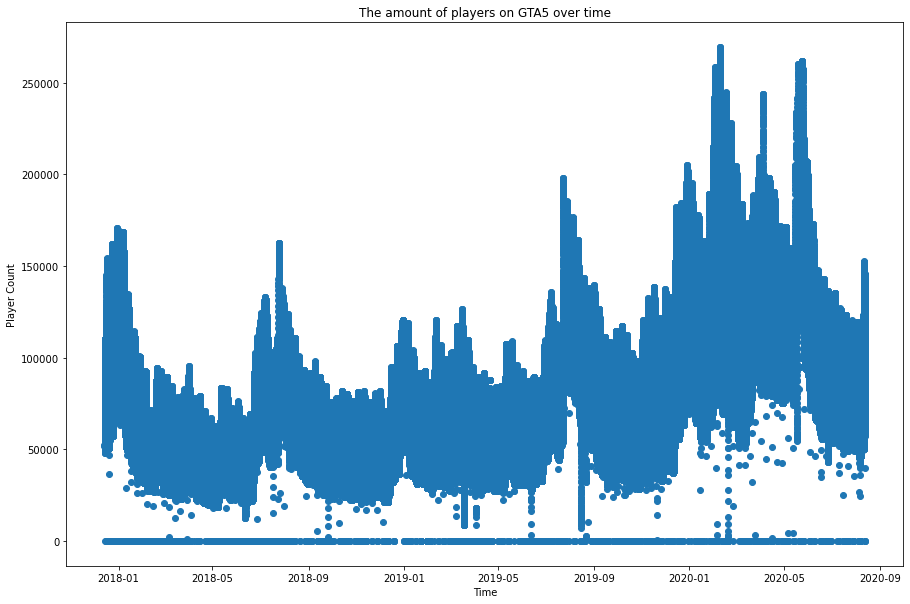

In [122]:
fig1, ax1 = plt.subplots(1, 1, figsize = (15, 10))
ax1.scatter(gta5_play_count['Time'], gta5_play_count['Playercount'])
ax1.set_xlabel("Time")
ax1.set_ylabel("Player Count")
ax1.set_title("The amount of players on GTA5 over time")
plt.show()

### Finale of project: comparing when CSGO was p2p vs f2p 
csgo became free to play december 6 2018

In [31]:
game_info[2:3]

,appid,type,name,releasedate,freetoplay
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0


In [9]:
csgo = pd.read_excel('730.xlsx')

In [46]:
csgo[0:1], csgo[40900:40901]

(        Time  Playercount
 0 2017-12-14     234777.0,
                      Time  Playercount
 40900 2018-05-05 00:20:00     206349.0)